In [40]:
import pandas as pd
data=pd.read_csv(r"C:\Users\prasa\OneDrive\Desktop\Book1.csv")# if I give the path as C:\Desktop\Book1.csv(file not found error)
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [41]:
from sklearn import tree
data2=data.copy()    # if i wrte just data without copy()  then later in cell 33 , i am nnot getting play column.
y=data2.pop("play")
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object

In [42]:
X=data2
X

,outlook,temp,humidity,windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False
5,rainy,cool,normal,True
6,overcast,cool,normal,True
7,sunny,mild,high,False
8,sunny,cool,normal,False
9,rainy,mild,normal,False


In [43]:
#dt=tree.DecisionTreeClassifier()
#dt.fit(X,y)
#dt

#  do encoding before fitting the model on data

# The Decision Tree Classifier in scikit learn does not take Strings as input.

If we have categorical variables in the data, then we must do encoding either one hot encoding or ordinal encoding

In [44]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
data=data.apply(en.fit_transform)
data


,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [45]:
X=data.loc[0:2]
X

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1


In [46]:
X=data.iloc[0:2]
X

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0


In [47]:
X=data.iloc[0:2,3:8] # even if i write 8 has higher limit, it does not return any error.prints upto the max value 
X

,windy,play
0,0,0
1,1,0


In [48]:
X=data.iloc[0:,0:4]
X

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [49]:
y=data.iloc[0:,-1]
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

In [50]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt


DecisionTreeClassifier()

In [51]:
a=dt.fit(X,y)
a

DecisionTreeClassifier()

[Text(133.92000000000002, 195.696, 'X[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(100.44000000000001, 108.72, 'X[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(66.96000000000001, 65.232, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(33.480000000000004, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(100.44000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(133.92000000000002, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(234.36, 108.72, 'X[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(200.88000000000002, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(267.84000000000003, 65.232, 'X[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(234.36, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 T

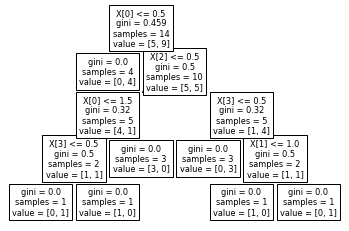

In [52]:
tree.plot_tree(a,)

[Text(133.92000000000002, 195.696, 'X[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(100.44000000000001, 108.72, 'X[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(66.96000000000001, 65.232, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(33.480000000000004, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(100.44000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(133.92000000000002, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(234.36, 108.72, 'X[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(200.88000000000002, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(267.84000000000003, 65.232, 'X[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(234.36, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 T

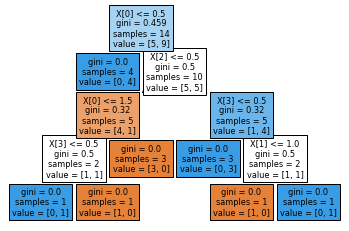

In [53]:
tree.plot_tree(a,filled=True)

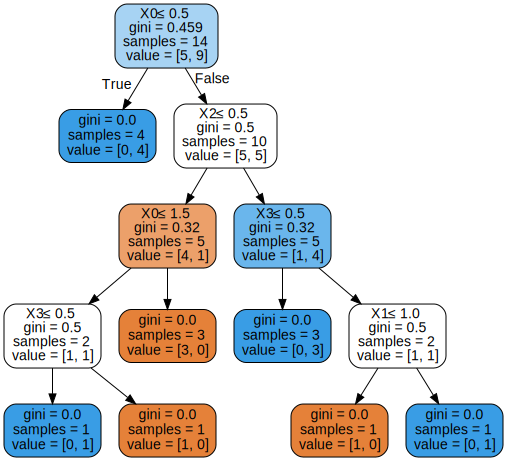

In [54]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz

b=tree.export_graphviz(a,out_file=None,feature_names=None,class_names=None,
                       filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(b)
graph